In [1]:
import cv2
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform
import numpy as np

number of contours detected  3041


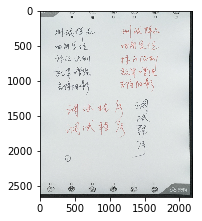

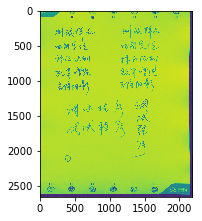

In [2]:
image = cv2.imread('E:/picture/IMG_9374.JPG')
from sklearn.svm import SVC
from sklearn.externals import joblib
row_begin=int(image.shape[0]-50)
row_end=int(image.shape[0])
column_begin=int(image.shape[1]-50)
column_end=int(image.shape[1])
block_1=image[row_begin:row_end,column_begin:column_end,0]
block_2=image[row_begin:row_end,column_begin:column_end,1]
block_3=image[row_begin:row_end,column_begin:column_end,2]
block1=list(block_1.flat)
block2=list(block_2.flat)
block3=list(block_3.flat)
block=[]
block.extend(block1)
block.extend(block2)
block.extend(block3)
X=np.zeros((1,7500))
for j in range(0,7500):
        X[0,j]=int(block[j])
clf=joblib.load("clf.m")
pred = clf.predict(X)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray, 43, 0)
blurred=cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,51,2)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
if (pred==1): blurred = cv2.erode(blurred,kernel)
if (pred==0): blurred = cv2.dilate(blurred,kernel)
#这一步可有可无，主要是增加一圈白框，以免刚好卷子边框压线后期边缘检测无果。好的样本图就不用考虑这种问题
blurred=cv2.copyMakeBorder(blurred,50,50,50,50,cv2.BORDER_CONSTANT,value=(255,255,255))
edged = cv2.Canny(blurred, 10, 100)
# 从边缘图中寻找轮廓，然后初始化答题卡对应的轮廓
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
print ("number of contours detected ", len(cnts))
docCnt = None
# 确保至少有一个轮廓被找到
if len(cnts) > 0 :
    # 将轮廓按大小降序排序
    #print("before sorted:", cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    #print("after sorted:", cnts)
    
    # 对排序后的轮廓循环处理
    for c in cnts:
        # 获取近似的轮廓
        peri = cv2.arcLength(c, True)
        area = cv2.contourArea(c)
        if (area > 2000000 and area<11000000) or peri>6000:
            approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        # 如果近似轮廓有四个顶点，那么就认为找到了答题卡
            if len(approx) ==4 or len(approx)==3:
              docCnt = approx
              break
newimage=image.copy()
for i in docCnt:
    #circle函数为在图像上作图，新建了一个图像用来演示四角选取
    cv2.circle(newimage, (i[0][0],i[0][1]), 50, (255, 0, 0), -1)
#print(docCnt)
#plt.subplot(222)
#plt.imshow(newimage)
#plt.show()
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))
plt.subplot(121)
plt.imshow(paper)
plt.show()
plt.subplot(122)
plt.imshow(warped)
plt.show()

In [99]:
print(paper.shape)

(2536, 2168, 3)


In [100]:
paper_1=paper[:,:,0]
paper_2=paper[:,:,1]
paper_3=paper[:,:,2]

In [101]:
ray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
blurred = cv2.medianBlur(gray, 43, 0)
blurred=cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,51,2)

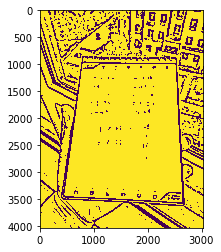

In [102]:
plt.imshow(blurred)
plt.show()

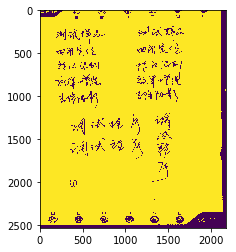

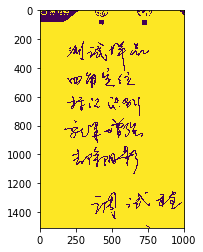

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [112]:
ret, ee = cv2.threshold(warped, 200, 255, cv2.THRESH_BINARY)
plt.imshow(ee)
plt.show()
#print(ee[1500:1510,30:50])
plt.imshow(ee[0:1510,0:1000])
plt.show()
print(ee)

(2536, 2168)


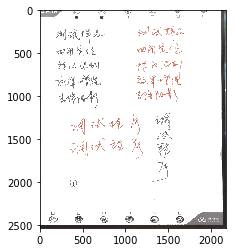

In [113]:
print(ee.shape)
paper_1_1=paper_1.copy()
paper_2_1=paper_2.copy()
paper_3_1=paper_3.copy()
for i in range(0,paper.shape[0]):
    for j in range(0,paper.shape[1]):
        if ee[i,j]==255: paper_1_1[i,j]=255
        if ee[i,j]==255: paper_2_1[i,j]=255
        if ee[i,j]==255: paper_3_1[i,j]=255

newpaper=paper.copy()
newpaper[:,:,0]=paper_1_1
newpaper[:,:,1]=paper_2_1
newpaper[:,:,2]=paper_3_1
plt.imshow(newpaper)
plt.show()

(2536, 2168)


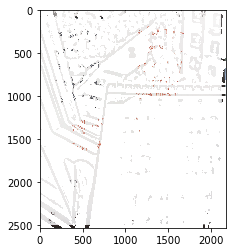

In [114]:
print(ee.shape)
paper_1_1=paper_1.copy()
paper_2_1=paper_2.copy()
paper_3_1=paper_3.copy()
for i in range(0,paper.shape[0]):
    for j in range(0,paper.shape[1]):
        if blurred[i,j]==255: paper_1_1[i,j]=255
        if blurred[i,j]==255: paper_2_1[i,j]=255
        if blurred[i,j]==255: paper_3_1[i,j]=255

newpaper=paper.copy()
newpaper[:,:,0]=paper_1_1
newpaper[:,:,1]=paper_2_1
newpaper[:,:,2]=paper_3_1
plt.imshow(newpaper)
plt.show()

In [60]:
paper_1.shape

(2588, 2392)

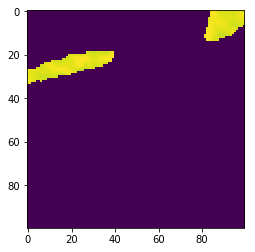

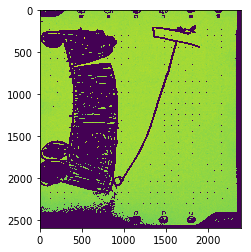

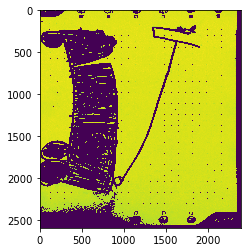

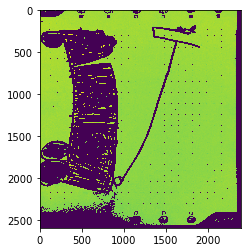

In [58]:
plt.imshow(newpaper[500:600,500:600,2])
plt.show()
plt.imshow(paper_1_1)
plt.show()
plt.imshow(paper_2_1)
plt.show()
plt.imshow(paper_3_1)
plt.show()

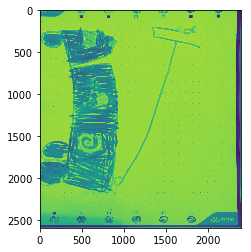

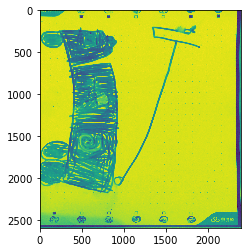

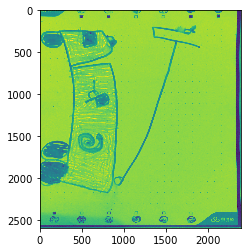

In [59]:
plt.imshow(paper[:,:,0])
plt.show()
plt.imshow(paper[:,:,1])
plt.show()
plt.imshow(paper[:,:,2])
plt.show()

(3, 3)


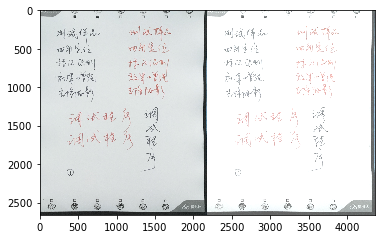

In [72]:
res = np.uint8(np.clip((0.9 * paper + 70), 100, 255))
res_2 = np.hstack((paper, res)) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(11, 11))
res_3= cv2.erode(res_2,kernel)
kernel2=np.array([0, -1, 0, 0, 5, 0, 0, -1, 0])
kernel2.shape=(3,3)
print(kernel2.shape)
dst = cv2.filter2D(paper,-1,kernel2)
hsv=cv2.cvtColor(res_3,cv2.COLOR_BGR2HSV)
#gaus=cv2.adaptiveThreshold(res_3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,155,1)
plt.imshow(res_2)
plt.show()

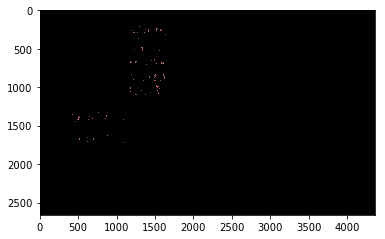

In [54]:
lower_blue=np.array([110,100,100])#blue
upper_blue=np.array([130,255,255])

lower_green=np.array([60,100,100])#green
upper_green=np.array([70,255,255])

lower_red=np.array([0,100,100])#red
upper_red=np.array([10,255,255])

red_mask=cv2.inRange(hsv,lower_red,upper_red)#取红色
blue_mask=cv2.inRange(hsv,lower_blue,upper_blue)#蓝色
green_mask=cv2.inRange(hsv,lower_green,upper_green)#绿色

red=cv2.bitwise_and(res_3,res_3,mask=red_mask)#对原图像处理
green=cv2.bitwise_and(res_3,res_3,mask=green_mask)
blue=cv2.bitwise_and(res_3,res_3,mask=blue_mask)

res_4=green+red+blue
plt.imshow(res_4)
plt.show()

In [ ]:
res = np.uint8(np.clip((0.8 * paper + 100), 200, 255))
res_2 = np.hstack((paper, res)) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(6, 6))
res_3= cv2.erode(res_2,kernel)
plt.imshow(res_3)
plt.show()